# **LAB 03: PRINCIPAL COMPONENT ANALYSIS**

# Data Exploration & Preprocessing

In [1587]:
# Import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [1588]:
# Import dataset 'cancer_reg.csv'
df1 = pd.read_csv("https://raw.githubusercontent.com/kanedinh/datasets/main/cancer_reg.csv")

df1.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [1589]:
print("Rows:", df1.shape[0])
print("Columns:", df1.shape[1])

Rows: 3047
Columns: 33


In [1590]:
df1.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [1591]:
print(df1.isnull().sum())

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

Ở thuộc tính 'pctsomecol18_24' chứa giá trị NULL lên đến 2285 so với 3047 tổng quan sát (75%). Vì do mất mát quá nhiều dữ liệu thuộc tính này nên ta có thể bỏ thuộc tính này.


In [1592]:
# Drop it
df1 = df1.drop('pctsomecol18_24', axis=1)

Còn 2 thuộc tính bị mất dữ liệu còn ta có thể fill vào dựa vào bằng việc trực quan hoá chúng để đưa ra quyết định việc nên sử dụng mean hoặc median hoặc mode.

<AxesSubplot: xlabel='pctprivatecoveragealone', ylabel='Count'>

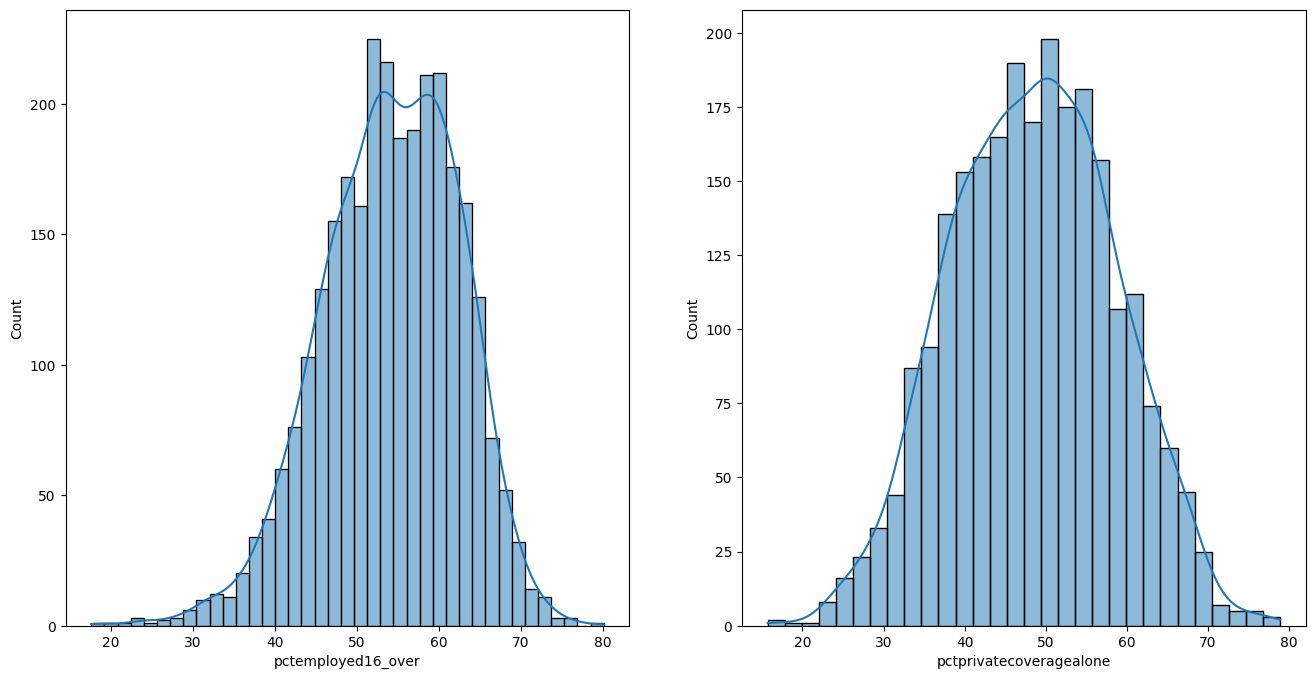

In [1593]:
fig, axes = plt.subplots(1,2,figsize=(16,8))

sns.histplot(df1['pctemployed16_over'], kde=True, ax=axes[0])

sns.histplot(df1['pctprivatecoveragealone'], kde=True, ax=axes[1])

In [1594]:
df1['pctemployed16_over'].fillna(df1['pctemployed16_over'].mean(), inplace=True) # Fill na with mean
df1['pctprivatecoveragealone'].fillna(df1['pctprivatecoveragealone'].mean(), inplace=True) # Fill na with mean

In [1595]:
print(df1.dtypes)

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack                   float64
pctasian            

Xử lý thuộc tính có chứa kiểu đối tượng (object)

In [1596]:
# handle col has type object
df1[['binnedinc','geography']]

,binnedinc,geography
0,"(61494.5, 125635]","Kitsap County, Washington"
1,"(48021.6, 51046.4]","Kittitas County, Washington"
2,"(48021.6, 51046.4]","Klickitat County, Washington"
3,"(42724.4, 45201]","Lewis County, Washington"
4,"(48021.6, 51046.4]","Lincoln County, Washington"
...,...,...
3042,"(45201, 48021.6]","Ellsworth County, Kansas"
3043,"(48021.6, 51046.4]","Finney County, Kansas"
3044,"(51046.4, 54545.6]","Ford County, Kansas"
3045,"(48021.6, 51046.4]","Franklin County, Kansas"


Tách cột 'binnedinc' thành 2 cột chứa giá trị theo nó

In [1597]:
def split_interval(interval):
    parts = interval[1:-1].split(',')
    return pd.Series([float(parts[0]), float(parts[1])])

In [1598]:
df1[['binnedincStart', 'binnedincEnd']] = df1['binnedinc'].apply(lambda x: split_interval(x))
df1 = df1.drop(columns='binnedinc')

df1.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,binnedincStart,binnedincEnd
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,61494.5,125635.0
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,48021.6,51046.4
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,48021.6,51046.4
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,42724.4,45201.0
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,48021.6,51046.4


In [1599]:
df1.isnull().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
binnedincStart             0
binnedincEnd               0
dtype: int64

In [1600]:
# import dataset 'avg-household-size.csv'
df2 = pd.read_csv("https://raw.githubusercontent.com/kanedinh/datasets/main/avg-household-size.csv")

df2.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [1601]:
print("Rows:", df2.shape[0])
print("Columns:", df2.shape[1])

Rows: 3220
Columns: 4


In [1602]:
# Check duplicate values
print('Duplicate values:', df2.duplicated().sum())

Duplicate values: 0


In [1603]:
print(df2.dtypes)

statefips             int64
countyfips            int64
avghouseholdsize    float64
geography            object
dtype: object


Hợp nhất 2 dataset thành 1 dataset duy nhất theo thuộc tính chung là 'geography'

In [1604]:
# merge 2 df into 1 df 
df = pd.merge(df1, df2, on='geography', how='inner')
df = df.drop(columns='geography')

df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,binnedincStart,binnedincEnd,statefips,countyfips,avghouseholdsize
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,2.594728,4.821857,1.843479,52.856076,6.118831,61494.5,125635.0,53,35,2.54
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,0.969102,2.246233,3.741352,45.372500,4.333096,48021.6,51046.4,53,37,2.34
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,0.739673,0.465898,2.747358,54.444868,3.729488,48021.6,51046.4,53,39,2.62
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,0.782626,1.161359,1.362643,51.021514,4.603841,42724.4,45201.0,53,41,2.52
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,0.270192,0.665830,0.492135,54.027460,6.796657,48021.6,51046.4,53,43,2.34


In [1605]:
print(df.dtypes)

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
medianage                  float64
medianagemale              float64
medianagefemale            float64
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack                   float64
pctasian                   float64
pctotherrace               float64
pctmarriedhouseholds

In [1606]:
# Change type -> category 
df['statefips'] = df['statefips'].astype('category')
df['countyfips'] = df['countyfips'].astype('category')

In [1607]:
print(df.isnull().sum())

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
medianage                  0
medianagemale              0
medianagefemale            0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
binnedincStart             0
binnedincEnd               0
statefips                  0
countyfips                 0
avghouseholdsi

In [1608]:
# Dataset final has
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 3047
Columns: 35


In [1609]:
# Split X: features and y: target
X = df.drop(columns='target_deathrate').values
y = df['target_deathrate'].values

print("X:", X.shape)
print("y:", y.shape)

X: (3047, 34)
y: (3047,)


In [1610]:
y = y.reshape(-1, 1)

print("X (Features) size:",X.shape)
print("y (Target) size:",y.shape)

X (Features) size: (3047, 34)
y (Target) size: (3047, 1)


In [1611]:
# Normalize data
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize data
X_std = scaler.fit_transform(X)

print("Scaled X:\n", X_std)

Scaled X:
 [[ 0.55832793  0.56151822  0.76132099 ...  1.5099204  -0.64049275
   0.04153788]
 [-0.30600329 -0.23006748 -0.67217947 ...  1.5099204  -0.62131702
  -0.76358879]
 [-0.35614015 -0.26974596 -1.80688124 ...  1.5099204  -0.60214129
   0.36358854]
 ...
 [ 0.95777583 -0.27768165  0.09680411 ... -0.6824207  -0.42955969
   2.05435453]
 [ 0.95777583 -0.26577811  0.09680411 ... -0.6824207  -0.41038396
   0.12205054]
 [ 0.95777583 -0.2737138   0.09680411 ... -0.6824207  -0.39120823
   1.20897154]]


# Implement PCA

In [1612]:
# Initialize PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_std)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained_variance_ratio:\n", explained_variance_ratio)
print("Total:", explained_variance_ratio.sum())

Explained_variance_ratio:
 [0.3026987  0.15145552 0.07566641 0.06269414 0.0414624  0.03722736
 0.03411838 0.02956883 0.0288384  0.02833869 0.02582714 0.02330628
 0.02093536 0.02024431 0.01679641 0.0149542  0.01400723 0.01306092
 0.01004662 0.0082638  0.00723122 0.00644698 0.00509274 0.00421375
 0.00381131 0.00251561 0.00226262 0.00188103 0.00186036 0.00163702
 0.00155948 0.00093789 0.00054263 0.00049624]
Total: 1.0


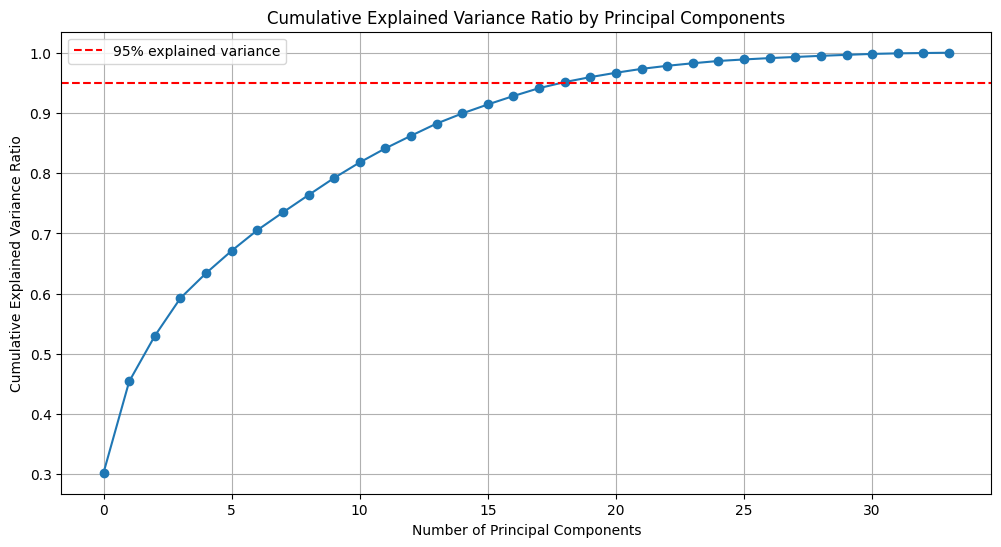

In [1613]:
# Visualize explained variance ratio
plt.figure(figsize=(12,6))
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.legend()
plt.show()

In [1614]:
def find_rate_info_keeping(explained_variance_ratio, n_cp):
    sum_ratio = 0
    i = 0
    for ratio in explained_variance_ratio:
        sum_ratio = sum_ratio + ratio
        i = i + 1
        if i == n_cp:
            return sum_ratio

In [1615]:
# need 19 vectors to keep 95,1% information
find_rate_info_keeping(explained_variance_ratio, 19)

0.9512473081958513

In [1616]:
# Print eigen vectors
print(f">> Eigen vectors (from scikit-learn): {pca.components_.shape}\n", pca.components_)

>> Eigen vectors (from scikit-learn): (34, 34)
 [[ 9.11947941e-02  7.12901276e-02  1.02262919e-03 ...  3.12518980e-02
  -2.08360717e-02 -5.26979137e-03]
 [ 2.49949456e-01  2.72116630e-01  1.94293152e-02 ... -6.88096694e-02
   3.59025359e-02  2.13015831e-01]
 [ 3.76894974e-01  3.78693172e-01  1.15242179e-01 ... -6.52356010e-02
  -1.56898651e-01 -3.32226977e-01]
 ...
 [ 2.39376622e-02 -2.25362596e-02  2.85047142e-03 ...  2.75420313e-04
   1.21558308e-02 -2.60805160e-01]
 [ 9.84271208e-02 -7.39764317e-01  1.04849408e-02 ...  6.23176722e-03
  -2.57332122e-03  1.19666152e-02]
 [-1.81459996e-02  9.43505395e-02 -5.84043024e-03 ...  7.79238414e-03
  -6.65652949e-04  3.72488206e-02]]


# Dimensionality Reduction & Analysis

Tạo bảng cho thấy được hiệu suất mô hình Linear Regression đối với tập dữ liệu này sau khi giảm đi số chiều (dùng cross validation)

In [1617]:
data = []
col = X_std.shape[1] - 1
info_keeping = round(find_rate_info_keeping(explained_variance_ratio, col) * 100, 2)

while (info_keeping >= 50): # Thông tin dữ liệu >= 90%
    pca = PCA(n_components=col)
    X_pca = pca.fit_transform(X_std)
    mean_score = cross_val_score(LinearRegression(fit_intercept= True), X_pca, y, cv = 5).mean()
    data.append([info_keeping, col, mean_score])
    col = col - 1
    info_keeping = round(find_rate_info_keeping(explained_variance_ratio, col) * 100, 2)

In [1618]:
df_score = pd.DataFrame(data, columns=["Info keeping (%)", "n_components", "mean cross_val_score"])
df_score

,Info keeping (%),n_components,mean cross_val_score
0,99.95,33,0.482401
1,99.90,32,0.481747
2,99.80,31,0.481294
3,99.65,30,0.481792
4,99.48,29,0.483182
5,99.30,28,0.481576
6,99.11,27,0.470916
7,98.88,26,0.468655
8,98.63,25,0.469187
9,98.25,24,0.468470


Thông thường, ta chọn từ 90% -> 95% thông tin dữ liệu được giữ lại => n_components: 16->20

Áp dụng mô hình Linear Regression lên tập dữ liệu ban đầu

In [1619]:
# Apply model LinearRegression on original dataset

cross_valid = cross_val_score(LinearRegression(fit_intercept= True), X_std, y, cv = 5)

mean_cross_valid = sum(cross_valid) / len (cross_valid)
print("Mean cross valid score:", mean_cross_valid)

Mean cross valid score: 0.48068741459694786


So sánh hiệu suất giữa 2 bên thì sau khi giảm số chiều (giữ 91% thông tin dữ liệu) thì hiệu suất mô hình giảm đi là 2.34% so với dữ liệu gốc cho thấy hiệu suất giảm không đáng kể. Đồ thị dưới đây sẽ cho thấy rõ hiệu suất mô hình ứng với từng số chiều

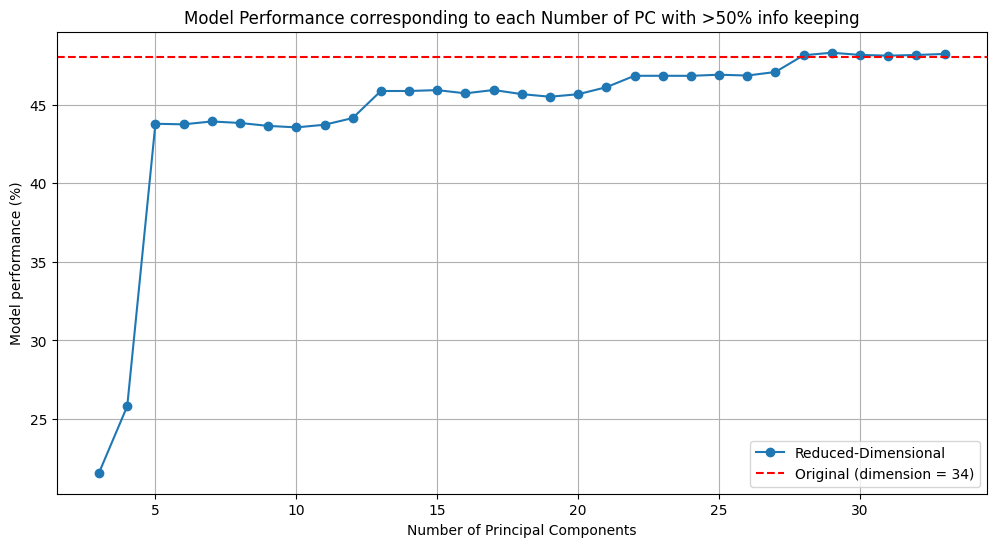

In [1620]:
plt.figure(figsize=(12,6))

plt.plot(df_score['n_components'],df_score['mean cross_val_score'] * 100, label='Reduced-Dimensional', marker='o')
plt.axhline(y=mean_cross_valid * 100, color='r', linestyle='--', label='Original (dimension = 34)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Model performance (%)')
plt.title("Model Performance corresponding to each Number of PC with >50% info keeping")
plt.legend()
plt.grid(True)
plt.show()

Qua đồ thị ta thấy được cứ mỗi khi giảm đi số chiều thì hiệu suất mô hình giảm đi nhẹ nhưng đến khi giảm số chiều từ 5 xuống 4 thì thấy rõ được hiệu suất mô hình giảm mạnh. Qua đó cho thấy được chiều thứ 5 có chứa thông tin quan trọng cần thiết cho sự chính xác của mô hình này. Có thể thấy đây là 1 khuyết điểm khá lớn nếu ta giảm số chiều có chứa thông tin quan trọng cần thiết cho mô hình.

Sử dụng PCA giúp tránh việc 'overfitting' khi nó giúp giảm đi số chiều và tránh được nhiễu.

Việc giảm đi số chiều của dữ liệu giúp cho việc áp dụng mô hình, tính toán trở nên nhanh hơn, tối ưu bộ nhớ.

# Report And Conclusion

Với dataset 'cancer_reg.csv':
- Loại bỏ thuộc tính 'pctsomecol18_24' do mất đến 75% dữ liệu so với tổng dữ liệu.
- Fill vào các dữ liệu bị mất ở 2 thuộc tính 'pctemployed16_over' và 'pctprivatecoveragealone' bằng trung bình của thuộc tính đó (dựa vào việc trực quan hoá thuộc tính đó).
- Tách thuộc tính 'binnedinc' thành 2 thuộc tính 'binnedincStart' và 'binnedincEnd'. 



Với dataset 'avg-household-size.csv': chuyển đổi kiểu dữ liệu ở 2 thuộc tính 'statefips' và 'countyfips' thành kiểu category.

Ta hợp nhất 2 dataset trên thành 1 dataset duy nhất dựa trên thuộc tính 'geography' của cả 2.

Ta áp dụng PCA để giảm số chiều của tập dữ liệu. Thông thường thì ta giữ lại từ 90% đến 95% thông tin từ tập dữ liệu gốc để cho ra số chiều thích hợp nhất để giữ. Bên cạnh đó qua bảng bên dưới dựa vào điểm 'mean cross_val_score' ta chọn được n_components là 16 (Best number) vì nó có hiệu suất mô hình tương đương với các số chiều trên nó (chênh lệch không đáng kể).

In [1621]:
df_score.iloc[12:19]

,Info keeping (%),n_components,mean cross_val_score
12,96.67,21,0.461223
13,95.95,20,0.456757
14,95.12,19,0.455162
15,94.12,18,0.456821
16,92.81,17,0.459445
17,91.41,16,0.457326
18,89.92,15,0.459379


Việc sử dụng PCA để giảm đi số chiều của các biến không độc lập khá quan trọng hiện nay. Khi mà dữ liệu luôn có kích thước rất lớn trong bối cảnh hiện nay (Big Data). Có thể lên đến hàng nghìn, hàng triệu hoặc hơn các biến không độc lập để cho ra biến độc lập. Mà khả năng của máy tính cũng có giới hạn nên việc sử dụng PCA để giảm kích thước của dữ liệu sẽ giúp máy tính xử lý nhanh hơn, tối ưu hoá bộ nhớ.